<a href="https://colab.research.google.com/github/Zeeshan13/Colab_HuggingFace/blob/main/ULMfit_Starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using FastAI ULMFiT to complete your assignment


## 0. Setup

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Installing and importing the necessary libraries
!pip install fastai --quiet
!pip install kaggle --quiet

from fastai.text.all import *

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 13.5 MB/s eta 0:00:00


In [ ]:
pd.set_option('display.max_colwidth', 100)

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1. Import the data

In [ ]:
# Loaded dataset and lables after creating the folder structure as shown below in Google
text_path = 'gdrive/My Drive/Colab Notebooks/title_StackOverflow.txt'
label_path = 'gdrive/My Drive/Colab Notebooks/label_StackOverflow.txt'

df_text = pd.read_csv(text_path, sep='\t', names=['text'], header=None, on_bad_lines='skip')
df_label = pd.read_csv(label_path, sep='\t', names=['label'], header=None, on_bad_lines='skip')

df = pd.concat([df_label, df_text], axis=1, sort=False)
print('Length of dataset: '+str(len(df.index)))
df.head()

Length of dataset: 20000


,label,text
0,18,How do I fill a DataSet or a DataTable from a LINQ query resultset ?
1,18,How do you page a collection with LINQ?
2,3,Best Subversion clients for Windows Vista (64bit)
3,3,"Best Practice: Collaborative Environment, Bin Directory, SVN"
4,7,Visual Studio Setup Project - Per User Registry Settings


from matplotlib import pyplot as plt
_df_3['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='label', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
mapping = {
  1: 'wordpress',
  2: 'oracle',
  3: 'svn',
  4: 'apache',
  5: 'excel',
  6: 'matlab',
  7: 'visual-studio',
  8: 'cocoa',
  9: 'osx',
  10: 'bash',
  11: 'spring',
  12: 'hibernate',
  13: 'scala',
  14: 'sharepoint',
  15: 'ajax',
  16: 'qt',
  17: 'drupal',
  18: 'linq',
  19: 'haskell',
  20: 'magento'
}

df['label'] = df['label'].map(mapping)

df.head()

,label,text
0,linq,How do I fill a DataSet or a DataTable from a LINQ query resultset ?
1,linq,How do you page a collection with LINQ?
2,svn,Best Subversion clients for Windows Vista (64bit)
3,svn,"Best Practice: Collaborative Environment, Bin Directory, SVN"
4,visual-studio,Visual Studio Setup Project - Per User Registry Settings


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_2.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('text')

## 2. Create train & validation datasets and FastAI data bunch

In [ ]:
from sklearn.model_selection import train_test_split

df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.3)

df_trn.shape, df_val.shape

((14000, 2), (6000, 2))

In [ ]:
df_trn.head()

,label,text
15493,excel,Drupal Views: output item fields grouped by field instead of item?
13722,drupal,Preventing NaN from being persisted by Hibernate
11558,ajax,Best Practice for Wordpress Theme Functionality
19555,magento,Add a date picker to system.xml on custom module
2336,visual-studio,Multi-lingual projects in Visual Studio


In [ ]:
# Concatenate the label and the text data
df = pd.concat([df_label, df_text], axis=1, sort=False)
print('Length of dataset: '+str(len(df.index)))
df.head()

Length of dataset: 20000


,label,text
0,18,How do I fill a DataSet or a DataTable from a LINQ query resultset ?
1,18,How do you page a collection with LINQ?
2,3,Best Subversion clients for Windows Vista (64bit)
3,3,"Best Practice: Collaborative Environment, Bin Directory, SVN"
4,7,Visual Studio Setup Project - Per User Registry Settings


In [ ]:
# Extract the text data only
df_lm = pd.concat([df_trn, df_val], axis=0)[['text']]
df_lm.head()

,text
15493,Drupal Views: output item fields grouped by field instead of item?
13722,Preventing NaN from being persisted by Hibernate
11558,Best Practice for Wordpress Theme Functionality
19555,Add a date picker to system.xml on custom module
2336,Multi-lingual projects in Visual Studio


In [ ]:
# Creating a dataloader for self-supervised learning task
dls_lm = DataBlock(
    blocks=TextBlock.from_df('text', is_lm=True),
    get_x=ColReader('text'),
    splitter=RandomSplitter(0.1))

In [ ]:
dls_lm = dls_lm.dataloaders(df_lm, bs=64, seq_len=72)

In [ ]:
dls_lm.show_batch(max_n = 3)

,text,text_
0,xxbos xxmaj how to get xxup os x to set initial location of nswindow xxbos xxmaj install xxup xxunk on xxup os x xxmaj leopard xxbos xxmaj sharepoint xxmaj workflow xxmaj modification is not disabled xxbos xxmaj bash script xxunk xxunk command xxbos xxmaj sharepoint 2007 template to site definition conversion xxbos xxunk and xxunk - what 's the difference ? xxbos xxmaj in what case would a programmer get the webapplicationcontext,xxmaj how to get xxup os x to set initial location of nswindow xxbos xxmaj install xxup xxunk on xxup os x xxmaj leopard xxbos xxmaj sharepoint xxmaj workflow xxmaj modification is not disabled xxbos xxmaj bash script xxunk xxunk command xxbos xxmaj sharepoint 2007 template to site definition conversion xxbos xxunk and xxunk - what 's the difference ? xxbos xxmaj in what case would a programmer get the webapplicationcontext out
1,a qtableview 's cells have up and down button xxunk states in xxmaj qt ? xxbos xxmaj what event is raised when a file is added to a project ? xxbos xxmaj permissions problems with xxmaj excel xxmaj services in sharepoint xxbos ajax library that xxunk multiple fields xxbos xxmaj do you have a common base class for xxmaj hibernate entities ? xxbos xxmaj jquery xxmaj ajax xxmaj validation xxmaj not xxmaj,qtableview 's cells have up and down button xxunk states in xxmaj qt ? xxbos xxmaj what event is raised when a file is added to a project ? xxbos xxmaj permissions problems with xxmaj excel xxmaj services in sharepoint xxbos ajax library that xxunk multiple fields xxbos xxmaj do you have a common base class for xxmaj hibernate entities ? xxbos xxmaj jquery xxmaj ajax xxmaj validation xxmaj not xxmaj xxunk
2,xxmaj bash xxmaj xxunk xxbos xxmaj multiple sections in xxmaj content xxmaj block for xxmaj drupal xxbos xxmaj drupal : xxmaj modifying a xxmaj user at xxmaj registration xxbos xxmaj complex builds in xxmaj visual xxmaj studio xxbos xxmaj how to combine xxup svn commits ? xxbos xxmaj visual xxmaj studio xxmaj task xxmaj panel xxbos xxmaj subversion and revision engineering - what are the best web resources to read about ?,bash xxmaj xxunk xxbos xxmaj multiple sections in xxmaj content xxmaj block for xxmaj drupal xxbos xxmaj drupal : xxmaj modifying a xxmaj user at xxmaj registration xxbos xxmaj complex builds in xxmaj visual xxmaj studio xxbos xxmaj how to combine xxup svn commits ? xxbos xxmaj visual xxmaj studio xxmaj task xxmaj panel xxbos xxmaj subversion and revision engineering - what are the best web resources to read about ? xxbos


## 3. Create and Train the Language Model

In [ ]:

## 3. Create and Train the Language Model

# Create the language model learner
learn_lm = language_model_learner(dls_lm, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity()])

# Fine-tune the language model
learn_lm.fine_tune(4, 1e-2)

# Saving the encoder
learn_lm.save_encoder('fine_tuned_encoder')

# Show some results
learn_lm.show_results()


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,5.148705,4.314726,0.288636,74.793152,00:21


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.062804,4.025865,0.321680,56.028732,00:25
1,3.885432,3.886312,0.331662,48.730858,00:23
2,3.680138,3.833473,0.338911,46.222801,00:24
3,3.517312,3.835095,0.339352,46.297832,00:22


,input,target,pred
0,"xxbos how can we delete certain option from an drop down xxunk ) xxbos xxmaj drupal multisite , xxmaj multiple xxmaj sites or xxmaj organic xxmaj groups xxbos xxmaj accessing type members outside the class in xxmaj scala xxbos xxmaj comparing entities while unit testing with xxmaj hibernate xxbos xxmaj hibernate not xxunk changes xxbos xxmaj what is the best xxmaj mac xxup os x software for making xxunk xxunk ? xxbos","how can we delete certain option from an drop down xxunk ) xxbos xxmaj drupal multisite , xxmaj multiple xxmaj sites or xxmaj organic xxmaj groups xxbos xxmaj accessing type members outside the class in xxmaj scala xxbos xxmaj comparing entities while unit testing with xxmaj hibernate xxbos xxmaj hibernate not xxunk changes xxbos xxmaj what is the best xxmaj mac xxup os x software for making xxunk xxunk ? xxbos xxmaj",xxmaj to i get a files in a xxmaj down in in in xxmaj how : xxunk how xxunk xxmaj views xxbos xxmaj sites xxmaj groups xxbos xxmaj how xxmaj xxmaj in of xxmaj xxbos xxmaj drupal xxbos xxmaj how xxmaj in using testing in xxmaj spring xxbos xxmaj how xxmaj working xxbos xxbos xxmaj how is the best way scala xxup os x xxmaj for developing a ? ? xxbos xxmaj
1,installing a xxmaj haskell package from xxmaj hackage through xxmaj cabal gets stuck at dependency resolution xxbos xxmaj visual xxmaj studio warning level xxunk ? xxbos how to edit xxunk without logout and login ? xxbos how to check if a string has spaces in bash shell xxbos xxmaj accessing the child xxup ui elements in a xxmaj qt xxup ui xxbos xxup soap and xxmaj spring xxbos xxmaj what does this,a xxmaj haskell package from xxmaj hackage through xxmaj cabal gets stuck at dependency resolution xxbos xxmaj visual xxmaj studio warning level xxunk ? xxbos how to edit xxunk without logout and login ? xxbos how to check if a string has spaces in bash shell xxbos xxmaj accessing the child xxup ui elements in a xxmaj qt xxup ui xxbos xxup soap and xxmaj spring xxbos xxmaj what does this xxmaj,xxmaj xxmaj spring xxunk on a spring on xxmaj xxunk 's started in the injection . xxmaj how xxmaj studio xxmaj : xxbos xxbos xxbos xxmaj to get a in using - not xxbos xxbos xxmaj to get if a file is been in the xxbos xxbos xxmaj how xxmaj xxmaj data xxunk from in xxmaj xxmaj qt application gui xxbos xxmaj linq xxmaj xxup cocoa xxmaj xxmaj how is the mean
2,customizing pages view in xxmaj sharepoint xxbos xxmaj using xxmaj haskell 's types to replace assert statements or if checks in other languages xxbos xxmaj how can i * prevent * xxmaj apache2 from setting the content - type header ? xxbos xxmaj any good c # code generator for using oracle stored procedures ? xxbos xxmaj how do i get output to show up in the xxmaj messages pane of the,pages view in xxmaj sharepoint xxbos xxmaj using xxmaj haskell 's types to replace assert statements or if checks in other languages xxbos xxmaj how can i * prevent * xxmaj apache2 from setting the content - type header ? xxbos xxmaj any good c # code generator for using oracle stored procedures ? xxbos xxmaj how do i get output to show up in the xxmaj messages pane of the xxmaj,xxmaj in in xxmaj visual xxbos xxmaj how xxmaj spring 's xxunk of xxunk a and xxbos arguments they are a files xxbos xxmaj how to i get xxunk a from xxunk from xxunk a default type type type in xxbos xxmaj how way xxmaj # or for for xxmaj xxmaj ? procedure ? xxbos xxmaj how to i get the of a the in xxmaj xxmaj visual xxmaj ? xxmaj xxmaj
3,"a temp workbook and return a reference to it with a vba function ? xxbos xxmaj moving xxmaj mac 's user settings to another users xxbos xxmaj why xxmaj scala is xxmaj very xxmaj complex xxbos xxmaj hibernate xxmaj criteria xxup api - how to order by collection size ? xxbos xxmaj has anyone else seen bugs in xxmaj excel 's activex combo boxes , ( xxunk when contained in a sheet","temp workbook and return a reference to it with a vba function ? xxbos xxmaj moving xxmaj mac 's user settings to another u

## 4. Using the Language Model to Train the Classifier

In [ ]:
# Creating the dataloaders for the classification task
dls_clas = DataBlock(
    blocks=(TextBlock.from_df('text', vocab=dls_lm.vocab), CategoryBlock),
    get_x=ColReader('text'),
    get_y=ColReader('label'),
    splitter=RandomSplitter(0.1)
).dataloaders(df, bs=64)



In [ ]:
# Defining the learner
learn_clas = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn_clas.load_encoder('fine_tuned_encoder')

In [ ]:
# Saving the encoder


In [ ]:
# Applying gradual unfreezing of one layer after another
learn_clas.fit_one_cycle(1, 2e-2)
learn_clas.freeze_to(-2)
learn_clas.fit_one_cycle(1, slice(1e-2/(2.6**4), 1e-2))
learn_clas.freeze_to(-3)
learn_clas.fit_one_cycle(1, slice(5e-3/(2.6**4), 5e-3))
learn_clas.unfreeze()
learn_clas.fit_one_cycle(2, slice(1e-3/(2.6**4), 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.291226,2.123746,0.430000,00:32


epoch,train_loss,valid_loss,accuracy,time
0,2.059420,1.986609,0.468000,00:39


epoch,train_loss,valid_loss,accuracy,time
0,1.926050,1.933434,0.482000,00:33


epoch,train_loss,valid_loss,accuracy,time
0,1.843784,1.919804,0.490500,00:31
1,1.799610,1.898304,0.492000,00:33


In [ ]:
# Saving the classifier model
learn_clas.save('text_classifier')


Path('models/text_classifier.pth')

## 5. Analyzing our results

,input,target,predicted,probability,loss
0,xxbos why the sql query is different on that linq query when run on c # and on vb.net ?,19,18,0.9914742708206177,11.668258666992188
1,xxbos xxup svn wo n't commit unversioned files even though they show up with svn status,9,3,0.999883770942688,8.747759819030762
2,xxbos xxmaj how can i xxunk mod_rewrite to stay away from my xxmaj subversion repositories ?,13,3,0.9744982719421387,8.29322624206543
3,xxbos xxmaj manually select related table data when xxunk in xxup linq to xxup sql,4,18,0.9661979675292969,7.863518238067627
4,xxbos xxup vs2008 : xxmaj make a non - linqed website linqed,18,7,0.8973957896232605,7.419311046600342
5,xxbos xxmaj what is the xxmaj cocoa equivalent of xxunk ?,18,8,0.9112457036972046,7.365017414093018
6,xxbos how to write string for include for linq query ?,17,18,0.9911819696426392,7.201891899108887
7,xxbos magento simple product link to open grouped products page,15,20,0.8657721281051636,6.966372489929199
8,xxbos xxunk is xxunk up my xxmaj mac,3,9,0.47976693511009216,6.705420970916748
9,xxbos magento price xxunk ( ) value,8,20,0.8170191049575806,6.330493927001953


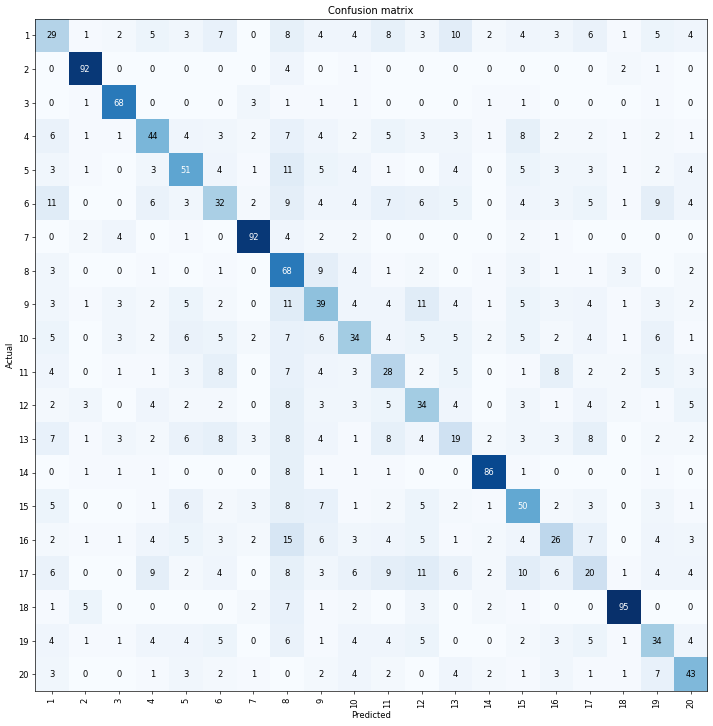

In [ ]:
# Display the confusion matrix
interp = ClassificationInterpretation.from_learner(learn_clas)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

# Show top losses
interp.plot_top_losses(10, nrows=2)

## 6. Predictions

In [ ]:
# Make predictions on the validation set
preds, targets = learn_clas.get_preds()
predictions = [learn_clas.dls.vocab[1][i] for i in preds.argmax(dim=1)]
print(predictions[:10])

# Display some prediction results
for i in range(10):
    print(f"Text: {df_val.iloc[i]['text']}\nActual: {df_val.iloc[i]['label']}\nPredicted: {predictions[i]}\n")

[1, 6, 15, 12, 9, 11, 16, 9, 7, 12]
Text: SharePoint exception documentation
Actual: sharepoint
Predicted: 1

Text: At which point in the life of an xmlHttpRequest object is serialised XML parsed into a DOM?
Actual: ajax
Predicted: 6

Text: Printing an NSImage
Actual: qt
Predicted: 15

Text: Pointer equality in Haskell?
Actual: qt
Predicted: 12

Text: Where are the clever uses of strict evaluation?
Actual: haskell
Predicted: 9

Text: How do I trouble shoot why my rewrite rules aren't being applied by apache?
Actual: apache
Predicted: 11

Text: Global Customized View for Document Libraries in Sharepoint
Actual: sharepoint
Predicted: 16

Text: Creating tables for copy from Word to Excel
Actual: excel
Predicted: 9

Text: Wordpress menu of categories
Actual: osx
Predicted: 7

Text: VS2008: Make a non-LINQed website LINQed
Actual: linq
Predicted: 12



## 7. Export the model

In [ ]:
# Export the final model
learn_clas.export('text_classifier_export.pkl')